In [37]:
import numpy as np
import catppuccin
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use(catppuccin.PALETTE.latte.identifier)

### Numerisk derivasjon (R)

Den deriverte i et punkt $x$ er gitt ved 

$$f'(x)=\lim_{\Delta x\to 0}\frac{f(x+\Delta x) - f(x)}{\Delta x}$$

#### En approksimasjon

Hvis vi bare gjør $\Delta x$ liten nok, kan vi få en grei verdi fra følgende approksimasjon

```{admonition} Approksimasjon: Derivert
:class: note

Hvis $\Delta x$ er liten nok kan vi finne en approksimasjon for den deriverte med formelen:

$$f'(x)\approx \frac{f(x + \Delta x)-f(x)}{\Delta x}$$
```

La oss finne den deriverte $f'(1)$ for funksjonen $f(x)=-x^2 + 4$

In [38]:
def f(x):
    return -x**2 + 4

def df(x, dx):
    return (f(x + dx) - f(x))/dx

print(df(1, 1e-8)) # 1e-8 er det samme som 1*10**(-8) -> 0.00000001

-1.999999987845058


Hvis vi regner for hånd får vi $f'(x)=-2x$ som gir $f'(1)=-2\cdot 1=-2$.

```{admonition} Advarsel: Veldig små tall
:class: warning

Prøv gjerne å sette inn mindre og mindre verdier for `dx`. Da vil du se at approksimasjonen blir rar rundt `dx = 1e-15`. Årsaken for dette er at desimaltall er håndtert på en spesiell måte i datamaskinen, som gjør at deling med veldig små tall gir uventede resultater.

Det er veier rundt dette, men approksimasjonene våre er greie nok med $\Delta x < 10^{-10}$ uansett.
```

#### En liten forbedring

I definisjonen vår for den deriverte lager vi et punkt til høyre for punktet $x$, finner den gjennomsnittlige vekstfarten mellom punktene, og så lenge $\Delta x$ er liten nok, er dette en god approksimasjon for den deriverte.

Vi kan få en litt bedre approksimasjon ved å lage to punkter som er like langt fra punktet $x$, et punkt foran og et punkt bak.

```{admonition} Approksimasjon: Sentraldifferanse
:class: note

Hvis $\Delta x$ er liten nok kan vi finne en approksimasjon for den deriverte med formelen:

$$f'(x)\approx \frac{f(x + \Delta x)-f(x - \Delta x)}{2\Delta x}$$
```

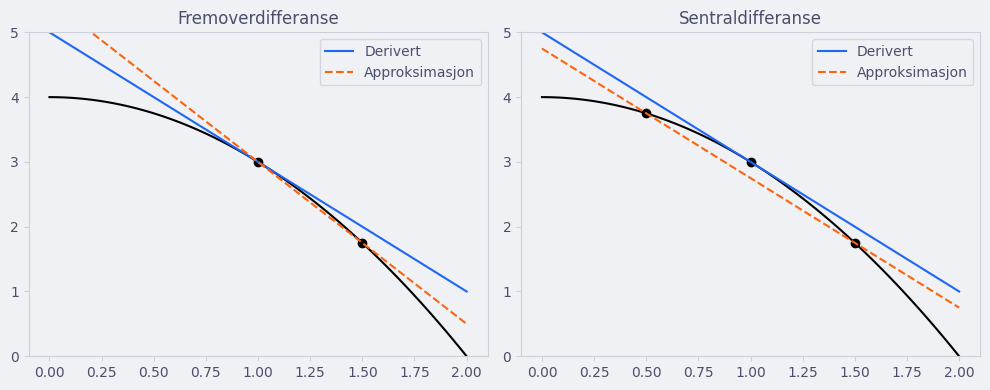

In [83]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return -x**2 + 4

def df(x):
    return -2*x

x = np.linspace(0, 2, 100)
deriv0 = lambda x : df(1)*(x - 1) + 3
deriv1 = lambda x : ((f(1.5) - f(1))/(1.5 - 1))*(x - 1) + 3
deriv2 = lambda x : ((f(0.5) - f(1.5))/(0.5 - 1.5))*(x - 0.5) + f(0.5)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(x, f(x), color = "black")
ax1.scatter(1, 3, color = "black")
ax1.scatter(1.5, f(1.5), color = "black")
ax1.plot(x, deriv0(x), label="Derivert")
ax1.plot(x, deriv1(x), "--", label="Approksimasjon")
ax1.legend()
ax1.set_ylim(0, 5)
ax1.set_title("Fremoverdifferanse")

ax2.plot(x, f(x), color = "black")
ax2.plot(x, deriv0(x), label="Derivert")
ax2.plot(x, deriv2(x), "--", label="Approksimasjon")
ax2.set_ylim(0, 5)
ax2.scatter(1, 3, color = "black")
ax2.scatter(1.5, f(1.5), color = "black")
ax2.scatter(0.5, f(0.5), color = "black")
ax2.set_title("Sentraldifferanse")
ax2.legend()

plt.tight_layout()

Stigningstallet til den stiplede linjen er approksimasjonen for den deriverte, mens stigningstallet til den solide linjen er den eksakte deriverte. Vi kan derfor se at approksimasjonen ofte ofte blir bedre dersom vi ser utover i begge retninger.

---

#### Oppgaver

````{admonition} Oppgave 1 ⛎
:class: task

```
def f(x):
    return 3*x**3 + 3*x

def df(x, dx):
    return (f(x + dx) - f(x))/dx

print(df(1, 1e-8))
```

Hva gjør dette programmet? Hva vil det skrive ut? Svar først, så sjekk svaret ditt ved å kjøre koden.
````